In [8]:

import quantp as qp
import numpy as np
import matplotlib.pyplot as plt


In [14]:



# i2=0
# # i3=0.25
# j2=0.5
# j3=0.5


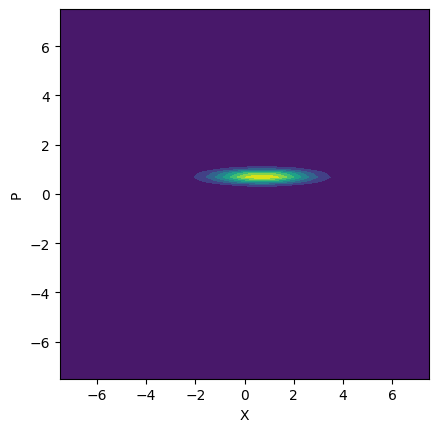

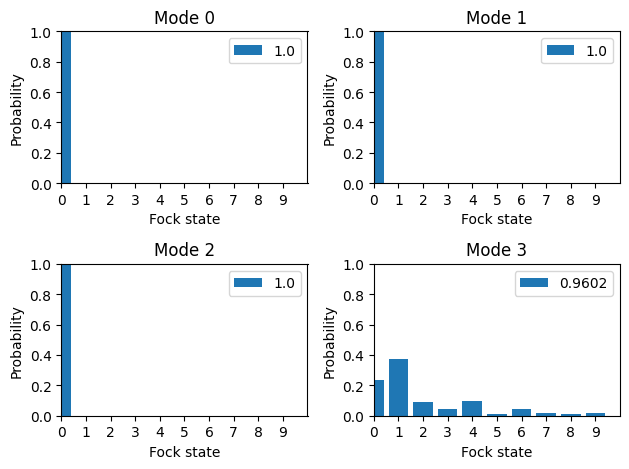

False

In [80]:
from simphony.quantum import QuantumSim, CoherentState, SqueezedState,ThermalState, compose_qstate
import thewalrus as tw


wl = 1.55 # um
R=[0.01,0.1,0.5,1,2,3.5]
R=[1]




i1=0.5
j1=0

for r in R:


    sim = QuantumSim(ckt=qp.trr, wl=wl, theta=i1, phi=j1)
   
    qstate= SqueezedState(port="int", r=1, phi=2*np.pi*0.5, alpha=(1+1j)*(1/np.sqrt(2)))
    
  
    

    # qstate=ThermalState(port="int",nbar=r)    
    # qstate = CoherentState(port="int", alpha=1+1j)
    # qstate_3 = CoherentState(port="in3", alpha=0)
    # qstate=compose_qstate(qstate_2,qstate_1,qstate_3)

    
    
    sim.add_qstate(qstate=qstate)
    res = sim.run()
    qstate.plot_mode(mode=0)
    res_state = res.state()



    fig, axes = plt.subplots(2,2)
    axes = axes.flatten()
    for i in range(4):
        means, cov = res_state.modes(i)
        fock_amp = tw.quantum.state_vector(means, cov, cutoff=10, hbar=1/2, check_purity=True)
        
        ax = axes[i]
        ax.set_title(f'Mode {i}')
         # Check if the probabilities sum to 1
        probabilities = np.abs(fock_amp)**2
        total_probability = np.sum(probabilities)
        prob=np.round(total_probability,4)       


        ax.bar(range(len(fock_amp)), abs(fock_amp)**2,  label=str(prob))
        ax.set_xticks(range(len(fock_amp)), range(len(fock_amp)))
        

        ax.legend()
        ax.set_xlim([0,10])
        ax.set_ylim([0,1])
        ax.set_xlabel("Fock state")
        ax.set_ylabel("Probability")
           

    
    plt.tight_layout()
    plt.show()

tw.quantum.is_valid_cov(cov)

In [46]:
tw.quantum.is_valid_cov(cov)

False

In [24]:
purity = 1 / np.sqrt(np.linalg.det(cov))
purity

3.9999999999999982